Pawel Pienkosz 14349299

# Importing and Exploring Data

We import the dataset into pandas dataframe.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Hotel_Reviews.csv")

We explore the data using head(), info(), and desribe() functions.

In [5]:
data.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


We also explore how many unique hotels and unique nationalities of custormers are in the dataset. We assume only one hotel is registered at one address.

In [8]:
unique_hotels = data["Hotel_Address"].unique()
unique_nationalities = data["Reviewer_Nationality"].unique()
print(f"There are {len(unique_hotels)} unique hotels.")
print(f"There are {len(unique_nationalities)} unique reviewer's nationalities.")

There are 1493 unique hotels.
There are 227 unique reviewer's nationalities.


# Preprocessing

## Handeling Missing Values

As we could see in the output from the describe function `lat` and `lng` attributes have lower count than other attributes which suggests some records are missing these values. We confirm this with isnull() function.

In [9]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

As suspected these attributes have missing values. We decided to fill them in.

First we extract the rows with missing geographical location.

In [10]:
rows_with_missing_values = data[data['lat'].isnull() | data['lng'].isnull()]


Then we extract distinct hotels with missing values.

In [11]:
distinct_hotels = rows_with_missing_values[['Hotel_Name', 'Hotel_Address']].drop_duplicates()


In [12]:
distinct_hotels

,Hotel_Name,Hotel_Address
99488,Mercure Paris Gare Montparnasse,20 Rue De La Ga t 14th arr 75014 Paris France
116738,Holiday Inn Paris Montmartre,23 Rue Damr mont 18th arr 75018 Paris France
177657,Maison Albar Hotel Paris Op ra Diamond,4 rue de la P pini re 8th arr 75008 Paris France
282265,NH Collection Barcelona Podium,Bail n 4 6 Eixample 08010 Barcelona Spain
327680,City Hotel Deutschmeister,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...
338919,Hotel Park Villa,Hasenauerstra e 12 19 D bling 1190 Vienna Austria
351449,Fleming s Selection Hotel Wien City,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...
352107,Cordial Theaterhotel Wien,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...
365418,Hotel Daniel Vienna,Landstra er G rtel 5 03 Landstra e 1030 Vienna...
395735,Roomz Vienna,Paragonstra e 1 11 Simmering 1110 Vienna Austria


As we can see the hotels with missing values are in either Paris (France), Barcelona (Spain) or Vienna (Austria). We decieded to fill in the missing values for the hotels using the latitude and longtitude of the corresponding city.

In [13]:
cities_location = {"Barcelona":(41.390205, 2.154007),
                  "Vienna" : (48.210033, 16.363449),
                  "Paris":(48.864716, 2.349014)}

To do that we extract city and country from the address attribute for each record. These values can also be useful in future analysis.

In [14]:
def extract_city(row):
    
    address = row["Hotel_Address"].split(" ")

    city = address[-2]

    return city

def extract_country(row):
    
    address = row["Hotel_Address"].split(" ")
    country = address [-1]

    return country

In [15]:
data["City"] = data.apply(extract_city, axis = 1)
data["Country"] = data.apply(extract_country, axis = 1)

In [16]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,City,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Amsterdam,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Amsterdam,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Amsterdam,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Amsterdam,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Amsterdam,Netherlands


Then for the record with missing location we fill it in with coresponding cooridantes.

In [17]:
def fill_missing_location(row, cities_location):
    if pd.isnull(row['lat']) or pd.isnull(row['lng']):
        city = row['City']
        row['lat'], row['lng'] = cities_location[city]
    return row


In [18]:
data = data.apply(lambda row: fill_missing_location(row, cities_location), axis=1)

We check if it worked.

In [19]:
data.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
City                                          0
Country                                       0
dtype: int64

It did, there is no missing values left

## Days_since_reviews

As we could see in during exploration, `Days_since_reviews` attribute is currently a string. To utilise it in our analysis we decided to transform it to integer representing the number of days.

In [20]:
def str_to_int_days(row):
    to_list = row["days_since_review"].split(" ")
    days = int(to_list[0])

    return days

In [21]:
data["days_since_review"] = data.apply(lambda row: str_to_int_days(row), axis=1)


We evalute if it worked.

In [22]:
data["days_since_review"]

0           0
1           0
2           3
3           3
4          10
         ... 
515733    704
515734    712
515735    715
515736    717
515737    725
Name: days_since_review, Length: 515738, dtype: int64

## Tags

To be able to classify or cluster reviwers by groups we decided to transform the tags attribute to binary attributes for each tag.

We start with formatting the `Tags` attribute.

In [23]:
def format_tag(tag):
    tag = tag.replace("[", "").replace("'", "").replace("]", "").strip().replace(" ","_").split("_,__")
    return tag

In [24]:
data["Tags"] = data["Tags"].apply(lambda x: format_tag(x))

In [25]:
data["Tags"][0]

['Leisure_trip', 'Couple', 'Duplex_Double_Room', 'Stayed_6_nights']

In [26]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,City,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[Leisure_trip, Couple, Duplex_Double_Room, Sta...",0,52.360576,4.915968,Amsterdam,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[Leisure_trip, Couple, Duplex_Double_Room, Sta...",0,52.360576,4.915968,Amsterdam,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[Leisure_trip, Family_with_young_children, Dup...",3,52.360576,4.915968,Amsterdam,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[Leisure_trip, Solo_traveler, Duplex_Double_Ro...",3,52.360576,4.915968,Amsterdam,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[Leisure_trip, Couple, Suite, Stayed_2_nights,...",10,52.360576,4.915968,Amsterdam,Netherlands


In [27]:
all_tags = set(tag for tags in data["Tags"] for tag in tags)

In [28]:
print(f"There are {len(all_tags)} distinct tags.")

There are 2428 distinct tags.


Since there are almost 2500 distinct tags we decided to focus on 30 most frequent ones and create 30 dummy binary variables.

In [29]:
from collections import Counter

all_tags = [tag for tags in data['Tags'] for tag in tags]

tag_counts = Counter(all_tags)

top_30_tags = [tag for tag in tag_counts.most_common(30)]


In [30]:
for tag in top_30_tags:
    data[tag[0]] = data['Tags'].apply(lambda tags: 1 if tag[0] in tags else 0)
    

In [31]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Superior_Double_or_Twin_Room,2_rooms,Stayed_6_nights,Standard_Twin_Room,Single_Room,Twin_Room,Stayed_7_nights,Executive_Double_Room,Classic_Double_or_Twin_Room,Superior_Twin_Room
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,0,0,1,0,0,0,0,0,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,0,0,0,0,0,0,0,0,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,0,0,0,0,0,0,0,0,0,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,0,0,0,0,0,0,0,0,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,0,0,0,0,0,0,0,0,0,0


The distribution of the 30 most frequent tags can be observed below. As we can see the frequency of the rest of tags can be consider negligable.

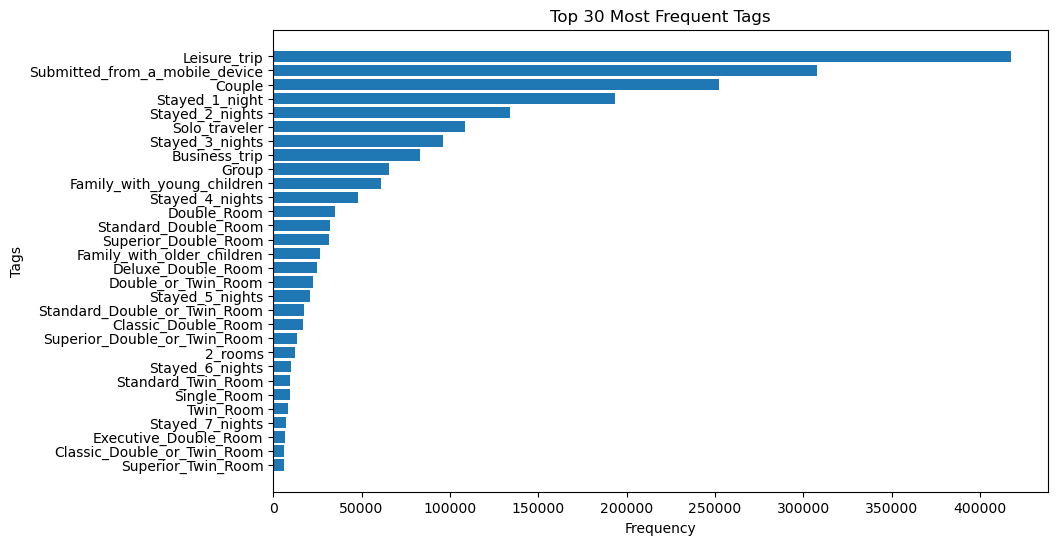

In [32]:
import matplotlib.pyplot as plt

tags, counts = zip(*tag_counts.most_common(30))

plt.figure(figsize=(10, 6))
plt.barh(tags, counts)
plt.gca().invert_yaxis()
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.title("Top 30 Most Frequent Tags")
plt.show()


## Nationality

We decided to create an additionaly binary attribute called `Domestic` to evalute the review was written by the customer from the same country as the hotel or from abroad.

In [33]:
def domestic(row):
    if row["Country"] == row["Reviewer_Nationality"]:
        return 1
    else:
        return 0


In [34]:
data["Domestic"] = data.apply(lambda row: domestic(row), axis = 1)

In [35]:
print(data["Domestic"].value_counts())

Domestic
0    515738
Name: count, dtype: int64


As we can see, the reviews are submitted only by the international visitors, thus we abandon this idea and drop the column `Domestic`.

In [36]:
data = data.drop("Domestic", axis=1)


## Duration of the trip

As we could see the tags include the trip duration. We decided to extract the duration as an integer for the analysis.

In [37]:
def duration_of_the_trip(row):
    tags = row["Tags"]
    for tag in tags:
        if "Stayed_" in tag and "_night" in tag:
            duration_list = tag.split("_")
            return int(duration_list[1])

In [38]:
data["Duration"] = data.apply(duration_of_the_trip, axis = 1)

We check for reviews without duration tags.

In [39]:
no_duration_data = data["Duration"].isnull().sum()
print(f"There are {no_duration_data} reviews with no stay duration data")

There are 192 reviews with no stay duration data


We decided to fill this missing values with the median of duration.

In [40]:
median_duration = data["Duration"].median()
data["Duration"] = data["Duration"].fillna(median_duration)


# Data Modeling and Experiments

## 1. Identifying the bias caused by `Nationality` on the `Reviewer_Score` 

We begin with creating a baseline for our classification model. We calculate the average review score and label reviews above the avergage with 1 and the reviews below average with 0.

In [122]:
avg_score = data["Reviewer_Score"].mean()

In [123]:
data["High_Rating"] = data["Reviewer_Score"].apply(lambda x: 1 if x > avg_score else 0)

<function matplotlib.pyplot.show(close=None, block=None)>

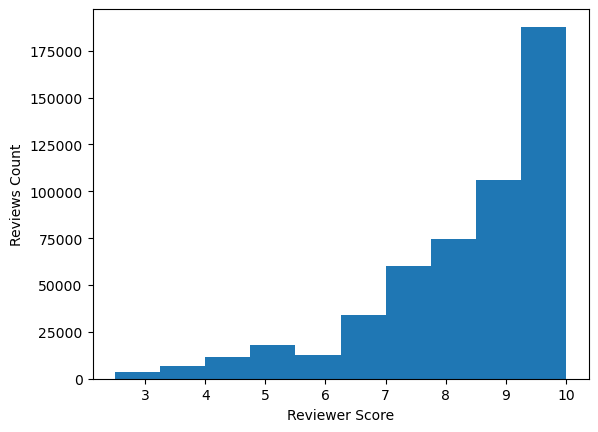

In [124]:
plt.hist(data["Reviewer_Score"])
plt.ylabel("Reviews Count")
plt.xlabel("Reviewer Score")
plt.show

The distribution is left skewed.

In [125]:
nationality_scores = pd.DataFrame(data.groupby('Reviewer_Nationality')['Reviewer_Score'].count().sort_values())
nationality_scores

,Reviewer_Score
Reviewer_Nationality,
Svalbard Jan Mayen,1
Guinea,1
Cape Verde,1
Vatican City,1
Northern Mariana Islands,1
...,...
United Arab Emirates,10235
Ireland,14827
Australia,21686


As we can see the reviews are not evenly distributed across the nationalities. Thus, we decided to also assign weights for each review based on the proportional number of reviews from each country. This apporach will allow us to avoid model overfitting and limit the influence of countries with few reviews.

In [126]:
reviews_per_country = data["Reviewer_Nationality"].value_counts()
country_weights = reviews_per_country/data["Reviewer_Nationality"].value_counts().mean()
data['Country_Weight'] = data['Reviewer_Nationality'].map(country_weights)

We use nationality and the weight as our independent variables and the high rating varible as target.

In [127]:
X = data[["Reviewer_Nationality", "Country_Weight"]]
y = data["High_Rating"]

For the nationality varible we use one hot encoding to create dummy variables.

In [128]:
X = pd.get_dummies(X, columns=["Reviewer_Nationality"], drop_first=True)

Although we are more interested in feature importance than in the classifying model, we split the data with a shuffle and test size of 0.3 to evalute if the features are predictive.

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=4)

We can see that the training set is imbalanced.

In [130]:
pd.DataFrame(y_train)["High_Rating"].value_counts()

High_Rating
1    205786
0    155230
Name: count, dtype: int64

We use radnom undersampling to address this issue.

In [131]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=True)
X_train_sub,y_train_sub = rus.fit_resample(X_train, y_train)

We train the random forest classfier. We do not limit the max_depth to avoid omitting some nationalities.

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=4, n_jobs=-1, n_estimators=200)
rf.fit(X_train_sub, y_train_sub)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=4)

In [133]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.37      0.43     66534
           1       0.61      0.73      0.66     88188

    accuracy                           0.58    154722
   macro avg       0.56      0.55      0.55    154722
weighted avg       0.56      0.58      0.56    154722



We also experiment with one Decision Tree.

In [134]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train_sub,y_train_sub)

DecisionTreeClassifier(random_state=4)

In [135]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.37      0.43     66534
           1       0.61      0.73      0.66     88188

    accuracy                           0.58    154722
   macro avg       0.56      0.55      0.55    154722
weighted avg       0.56      0.58      0.56    154722



The results are almost identical to random forest with 200 estimators as for one Decision Tree which requires shorter computation time.

We also train Logistic Regression Model with default L2 regularization.

In [136]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4, max_iter=100000)

In [137]:
lr.fit(X_train_sub, y_train_sub, sample_weight= X_train_sub["Country_Weight"])

LogisticRegression(max_iter=100000, random_state=4)

In [138]:
y_pred = lr.predict_proba(X_test)[:,1] > 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45     66534
           1       0.61      0.69      0.64     88188

    accuracy                           0.57    154722
   macro avg       0.55      0.55      0.55    154722
weighted avg       0.56      0.57      0.56    154722



All models tend to label reviews as high even after undersampling which result in higher recall of positve cases. The models score quite good conisdering it is based only on the nationality. What we are more interested in is the bias of the nationality on this predicition. To inspect that we decided to utilise our logistic regression model and more specifiaclly to we extract coefficients. Positive coefficient indicated the nationality is more lenient and tends to score higher. Similarly, negative coefficient indicates the nationality tends to score lower.

Considering the fact that the model will not be used for predicitons and only to understand the influence of nationality on the score , we decided to train the Logistic Regression model again using the whole dataset to get more information before extracting coefficients.

In [139]:
lr.fit(X, y, sample_weight= X["Country_Weight"])

coefficients = lr.coef_[0]

feature_names = X_train_sub.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})


In [140]:
top_10_positive_bias = coef_df.sort_values(by = "Coefficient", ascending=0).head(10)
top_10_negative_bias = coef_df.sort_values(by = "Coefficient", ascending=1).head(10)

In [141]:
relevent_countries = pd.concat([top_10_negative_bias, top_10_positive_bias], axis = 0)

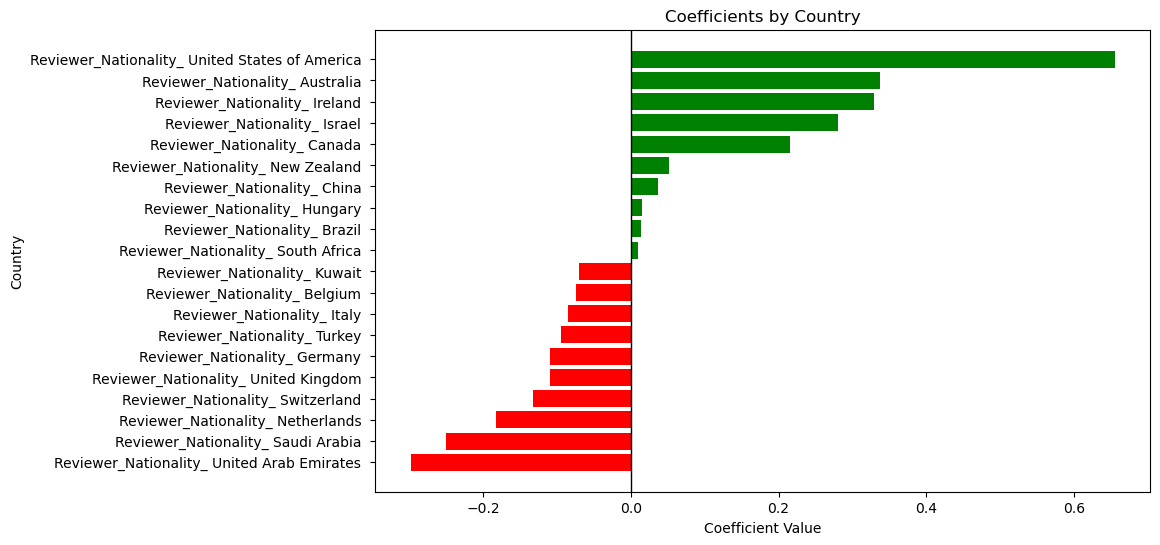

In [142]:
relevant_countries = relevent_countries.sort_values(by="Coefficient", ascending=True)

colors = relevant_countries["Coefficient"].apply(lambda x: "green" if x > 0 else "red")

plt.figure(figsize=(10, 6))
plt.barh(relevant_countries["Feature"], relevant_countries["Coefficient"], color=colors)
plt.axvline(0, color='black', linewidth=1)
plt.title("Coefficients by Country")
plt.xlabel("Coefficient Value")
plt.ylabel("Country")
plt.show()